In [75]:
import sklearn as sk
from sklearn import linear_model
import pandas as pd
import numpy as np

In [76]:
X = pd.read_csv('data/preprocessing/X.csv')
y = pd.read_csv('data/preprocessing/y.csv')

In [77]:
size = y.shape[0]
mu = 0
sigma = 1e-6
noise = np.random.normal(mu,sigma,size)

In [78]:
y['noise'] = y['email_time_center'] + sigma

In [79]:
y[y['noise'] == 0]

,email_time_center,noise


array([[<Axes: title={'center': 'email_time_center'}>,
        <Axes: title={'center': 'noise'}>]], dtype=object)

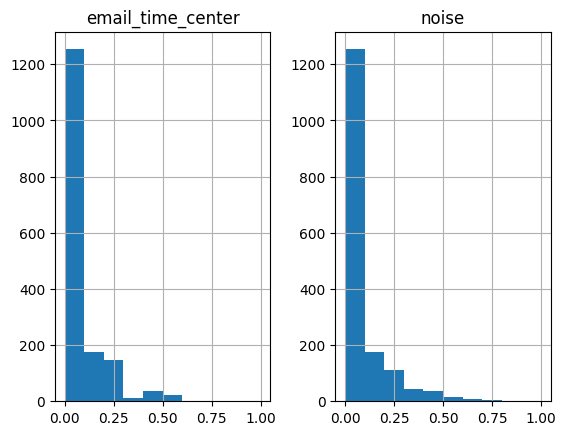

In [80]:
y.hist()

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y['noise'], test_size=0.2, random_state=42)

In [83]:
print(X_train.shape)
print(y_train.shape)

(1319, 28)
(1319,)


<Axes: >

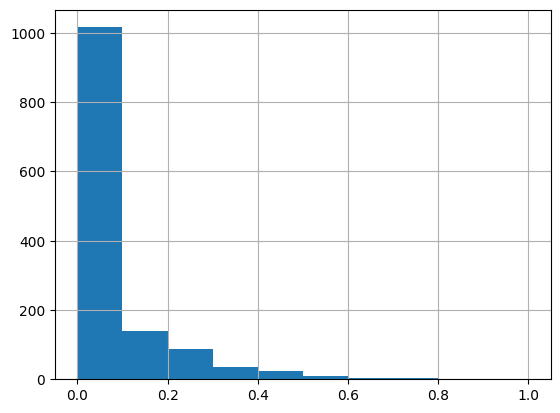

In [84]:
y_train.hist()

<Axes: >

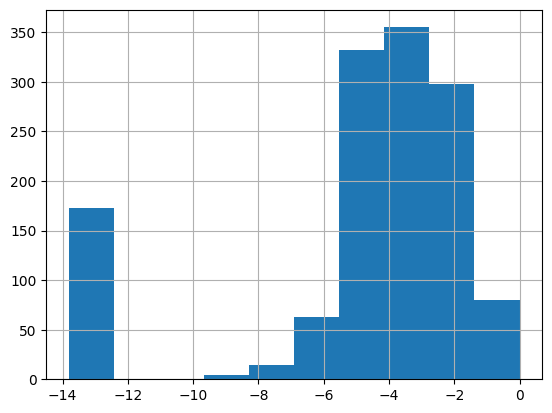

In [85]:
y_train_log = np.log(y_train)
y_train_log.hist()

In [86]:
clf = linear_model.GammaRegressor()
clf.fit(X_train, y_train)

GammaRegressor()

In [87]:
# clf.coef_

In [88]:
y_pred = clf.predict(X_test)

In [89]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

0.01420051544314026

In [90]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [95]:
y_test_log.shape

(330,)

In [92]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train_log)

ElasticNet(random_state=0)

In [97]:
y_pred = np.exp(regr.predict(X_test))

mean_squared_error(y_test, y_pred)

0.019634845472408